In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install mediapipe opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 40.5 MB/s eta 0:00:00


In [ ]:
import mediapipe as mp
import cv2
import time
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils # For drawing keypoints
points = mpPose.PoseLandmark # Landmarks
path = "/content/gdrive/MyDrive/DATASET/TEST/warrior2" # enter dataset path
data = []
for p in points:
        x = str(p)[13:]
        data.append(x + "_x")
        data.append(x + "_y")
        data.append(x + "_z")
        data.append(x + "_vis")
data = pd.DataFrame(columns = data) # Empty dataset

In [ ]:
count = 0

for img in os.listdir(path):

        temp = []

        img = cv2.imread(path + "/" + img)

        imageWidth, imageHeight = img.shape[:2]

        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        blackie = np.zeros(img.shape) # Blank image

        results = pose.process(imgRGB)

        if results.pose_landmarks:

                # mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS) #draw landmarks on image

                mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie

                landmarks = results.pose_landmarks.landmark

                for i,j in zip(points,landmarks):

                        temp = temp + [j.x, j.y, j.z, j.visibility]

                data.loc[count] = temp

                count +=1

        # cv2.imshow("Image", img)

        # cv2.imshow("blackie",blackie)

        # cv2.waitKey(100)

data.to_csv("/content/gdrive/MyDrive/DATASET/TEST/warrior2.csv") # save the data as a csv file

In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/DATASET/TEST/warrior2.csv")
df=df.iloc[:,1:]
df

,NOSE_x,NOSE_y,NOSE_z,NOSE_vis,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_vis,LEFT_EYE_x,LEFT_EYE_y,...,RIGHT_HEEL_z,RIGHT_HEEL_vis,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_vis,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_vis
0,0.572782,0.348226,-0.214193,0.999991,0.567246,0.333321,-0.178964,0.999979,0.566914,0.332762,...,-0.115419,0.987067,0.777665,0.850596,-0.108682,0.995276,0.204933,0.866196,-0.272993,0.997457
1,0.504818,0.166706,-0.342545,0.999964,0.516288,0.146583,-0.323935,0.999799,0.520642,0.145924,...,0.031855,0.987439,0.745441,0.968848,-0.125184,0.994655,0.255148,0.959066,-0.090275,0.996903
2,0.415177,0.341168,-0.190748,0.999954,0.428648,0.326439,-0.195654,0.999782,0.433576,0.326384,...,0.070927,0.986003,0.833706,0.868875,0.036658,0.992795,0.218733,0.825376,-0.007454,0.994089
3,0.592215,0.203994,-0.252527,0.999954,0.584842,0.178161,-0.218230,0.999797,0.582844,0.177304,...,-0.098379,0.985991,0.835351,0.955755,-0.094600,0.992494,0.086205,0.955440,-0.262442,0.994370
4,0.484171,0.131519,-0.189402,0.999948,0.491170,0.114110,-0.204142,0.999759,0.495444,0.113604,...,0.045576,0.984561,0.833010,0.935058,-0.199997,0.990352,0.253629,0.943974,-0.078603,0.992859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.437514,0.145363,-0.174262,0.964831,0.441906,0.121193,-0.178341,0.968401,0.443913,0.121995,...,0.005111,0.583037,0.725308,0.976043,-0.079244,0.595634,0.208156,0.966937,-0.106588,0.586773
109,0.479475,0.343281,-0.202352,0.954939,0.493068,0.332611,-0.214805,0.956899,0.495981,0.333805,...,0.228337,0.621424,0.781087,0.888123,0.051945,0.633147,0.332549,0.930694,0.124779,0.623518
110,0.438426,0.254319,-0.169934,0.957600,0.237299,0.230750,-0.168377,0.959638,0.274006,0.229996,...,0.331630,0.619631,0.539845,1.010826,-0.170682,0.638891,0.377494,0.960352,0.372162,0.612629
111,0.351879,0.030935,-0.286218,0.961836,0.263363,-0.004082,-0.284628,0.963665,0.305101,-0.006791,...,-0.023056,0.635353,0.925723,1.068781,-0.309818,0.659761,0.273935,1.119304,-0.196428,0.624687


In [ ]:
df["pose"]="warrior2"
df.to_csv("/content/gdrive/MyDrive/DATASET/TEST/warrior2.csv")

In [ ]:
df.shape

(113, 133)

In [ ]:
df

,NOSE_x,NOSE_y,NOSE_z,NOSE_vis,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_vis,LEFT_EYE_x,LEFT_EYE_y,...,RIGHT_HEEL_vis,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_vis,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_vis,pose
0,0.572782,0.348226,-0.214193,0.999991,0.567246,0.333321,-0.178964,0.999979,0.566914,0.332762,...,0.987067,0.777665,0.850596,-0.108682,0.995276,0.204933,0.866196,-0.272993,0.997457,warrior2
1,0.504818,0.166706,-0.342545,0.999964,0.516288,0.146583,-0.323935,0.999799,0.520642,0.145924,...,0.987439,0.745441,0.968848,-0.125184,0.994655,0.255148,0.959066,-0.090275,0.996903,warrior2
2,0.415177,0.341168,-0.190748,0.999954,0.428648,0.326439,-0.195654,0.999782,0.433576,0.326384,...,0.986003,0.833706,0.868875,0.036658,0.992795,0.218733,0.825376,-0.007454,0.994089,warrior2
3,0.592215,0.203994,-0.252527,0.999954,0.584842,0.178161,-0.218230,0.999797,0.582844,0.177304,...,0.985991,0.835351,0.955755,-0.094600,0.992494,0.086205,0.955440,-0.262442,0.994370,warrior2
4,0.484171,0.131519,-0.189402,0.999948,0.491170,0.114110,-0.204142,0.999759,0.495444,0.113604,...,0.984561,0.833010,0.935058,-0.199997,0.990352,0.253629,0.943974,-0.078603,0.992859,warrior2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.437514,0.145363,-0.174262,0.964831,0.441906,0.121193,-0.178341,0.968401,0.443913,0.121995,...,0.583037,0.725308,0.976043,-0.079244,0.595634,0.208156,0.966937,-0.106588,0.586773,warrior2
109,0.479475,0.343281,-0.202352,0.954939,0.493068,0.332611,-0.214805,0.956899,0.495981,0.333805,...,0.621424,0.781087,0.888123,0.051945,0.633147,0.332549,0.930694,0.124779,0.623518,warrior2
110,0.438426,0.254319,-0.169934,0.957600,0.237299,0.230750,-0.168377,0.959638,0.274006,0.229996,...,0.619631,0.539845,1.010826,-0.170682,0.638891,0.377494,0.960352,0.372162,0.612629,warrior2
111,0.351879,0.030935,-0.286218,0.961836,0.263363,-0.004082,-0.284628,0.963665,0.305101,-0.006791,...,0.635353,0.925723,1.068781,-0.309818,0.659761,0.273935,1.119304,-0.196428,0.624687,warrior2


In [ ]:
import pandas as pd

# merging two csv files
df1 = pd.concat(
    map(pd.read_csv, ['/content/gdrive/MyDrive/DATASET/TEST/downdog.csv', '/content/gdrive/MyDrive/DATASET/TEST/goddess.csv', '/content/gdrive/MyDrive/DATASET/TEST/plank.csv','/content/gdrive/MyDrive/DATASET/TEST/warrior2.csv','/content/gdrive/MyDrive/DATASET/TEST/tree.csv']), ignore_index=True)
df1=df1.iloc[:,1:]
print(df1)
df1.columns
df1.to_csv("/content/gdrive/MyDrive/DATASET/TEST/final_test.csv")

       NOSE_x    NOSE_y    NOSE_z  NOSE_vis  LEFT_EYE_INNER_x  \
0    0.396918  0.730234 -0.096398  0.983819          0.382438   
1    0.428393  0.664534 -0.111518  0.985236          0.413556   
2    0.437742  0.634842 -0.092118  0.986700          0.423752   
3    0.367011  0.725881 -0.017043  0.983916          0.348814   
4    0.367705  0.593830 -0.361139  0.984119          0.387036   
..        ...       ...       ...       ...               ...   
454  0.565289  0.300766 -0.849652  0.986047          0.583786   
455  0.535678  0.186561 -0.078757  0.977575          0.544047   
456  0.544884  0.195319 -0.375858  0.976624          0.564418   
457  0.544826  0.217171 -0.137917  0.978204          0.550059   
458  0.478057  0.319552 -0.320794  0.934404          0.491641   

     LEFT_EYE_INNER_y  LEFT_EYE_INNER_z  LEFT_EYE_INNER_vis  LEFT_EYE_x  \
0            0.731526         -0.124915            0.988806    0.380837   
1            0.668896         -0.142154            0.989791    0.4118

In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/DATASET/TEST/final_test.csv")
data=data.iloc[:,1:]
data

,NOSE_x,NOSE_y,NOSE_z,NOSE_vis,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_vis,LEFT_EYE_x,LEFT_EYE_y,...,RIGHT_HEEL_vis,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_vis,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_vis,pose
0,0.396918,0.730234,-0.096398,0.983819,0.382438,0.731526,-0.124915,0.988806,0.380837,0.728942,...,0.474203,0.656763,0.863843,-0.163596,0.976929,0.649146,0.850480,0.221194,0.466030,downdog
1,0.428393,0.664534,-0.111518,0.985236,0.413556,0.668896,-0.142154,0.989791,0.411811,0.666333,...,0.478926,0.721820,0.816345,-0.171173,0.976687,0.711977,0.801917,0.249266,0.473784,downdog
2,0.437742,0.634842,-0.092118,0.986700,0.423752,0.634088,-0.134559,0.990803,0.423059,0.631633,...,0.499128,0.752082,0.771762,0.132334,0.976770,0.734505,0.754527,0.522328,0.505572,downdog
3,0.367011,0.725881,-0.017043,0.983916,0.348814,0.721332,-0.056994,0.988800,0.347742,0.717608,...,0.466258,0.781755,0.870300,-0.083938,0.967989,0.769588,0.853815,0.283038,0.469587,downdog
4,0.367705,0.593830,-0.361139,0.984119,0.387036,0.597766,-0.359026,0.988087,0.390243,0.598242,...,0.509209,0.492609,0.709606,0.178027,0.945725,0.535537,0.830116,0.042156,0.516776,downdog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,0.565289,0.300766,-0.849652,0.986047,0.583786,0.286855,-0.794840,0.983121,0.596170,0.286829,...,0.667744,0.577021,0.920265,-0.203145,0.773481,0.616133,0.715929,0.332466,0.680031,tree
455,0.535678,0.186561,-0.078757,0.977575,0.544047,0.170177,-0.063446,0.973154,0.548230,0.169786,...,0.692130,0.549026,0.665505,-0.371769,0.778623,0.514175,0.917825,-0.326974,0.699709,tree
456,0.544884,0.195319,-0.375858,0.976624,0.564418,0.173381,-0.355755,0.971219,0.575376,0.175412,...,0.667376,0.435396,0.616001,-0.598735,0.735972,0.422559,0.662324,-0.392498,0.664749,tree
457,0.544826,0.217171,-0.137917,0.978204,0.550059,0.203900,-0.129261,0.973260,0.554980,0.206355,...,0.656062,0.497042,0.357181,-0.029413,0.725401,0.538159,0.274884,-0.187392,0.652443,tree


In [ ]:
train=pd.read_csv(r"/content/gdrive/MyDrive/DATASET/TRAIN/final_train.csv")
train=train.iloc[:,1:]
train

,NOSE_x,NOSE_y,NOSE_z,NOSE_vis,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_vis,LEFT_EYE_x,LEFT_EYE_y,...,RIGHT_HEEL_vis,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_vis,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_vis,pose
0,0.415092,0.678437,-0.035257,0.999260,0.389374,0.683943,-0.078691,0.999429,0.385444,0.680806,...,0.467491,0.833564,0.854598,-0.030145,0.969620,0.821841,0.834830,0.436641,0.540311,downdog
1,0.585563,0.527641,-0.446964,0.964962,0.598003,0.543749,-0.461351,0.969783,0.600362,0.549694,...,0.506036,0.433560,0.784371,0.273995,0.914474,0.169295,0.826465,-0.218313,0.566548,downdog
2,0.503828,0.707413,-0.038962,0.968171,0.489373,0.710609,-0.072536,0.972432,0.488900,0.709358,...,0.530073,0.818951,1.220927,0.052408,0.902375,0.747449,1.197127,0.538691,0.580104,downdog
3,0.424622,0.550977,-0.177709,0.971348,0.412432,0.542529,-0.229728,0.975185,0.416706,0.540394,...,0.537371,0.826695,0.802014,0.069756,0.907071,0.774149,0.754622,0.557651,0.586735,downdog
4,0.431803,0.623347,-0.100902,0.974043,0.404638,0.631670,-0.140362,0.977546,0.401719,0.630898,...,0.535475,0.766924,0.825634,-0.232994,0.913447,0.784627,0.815910,0.361176,0.583761,downdog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,0.452710,0.246812,-0.438781,0.928457,0.463598,0.234745,-0.406236,0.916450,0.470832,0.234884,...,0.666839,0.416537,0.957150,0.054187,0.721251,0.421568,0.703421,0.279425,0.661349,tree
968,0.510972,0.105511,-0.373740,0.935518,0.517237,0.088933,-0.345511,0.924673,0.521309,0.088961,...,0.677620,0.537996,0.706281,0.313090,0.690790,0.524829,0.988504,0.041050,0.678150,tree
969,0.516105,0.229043,-0.261966,0.941440,0.524478,0.219606,-0.209168,0.931556,0.532060,0.219932,...,0.695149,0.517563,0.970969,0.042100,0.718890,0.547198,0.751558,0.334044,0.696109,tree
970,0.505417,0.482617,-0.288937,0.860213,0.518654,0.417635,-0.151645,0.848812,0.527382,0.421850,...,0.629524,0.604467,2.354911,0.308533,0.649571,0.384047,2.009739,0.116232,0.628876,tree


<Axes: xlabel='pose', ylabel='count'>

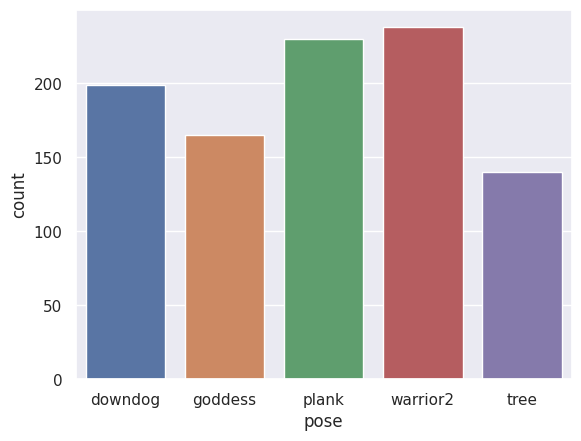

In [ ]:
sns.set(style = "darkgrid")
sns.countplot(x = "pose",data=train)

In [ ]:
test=pd.read_csv("/content/gdrive/MyDrive/DATASET/TEST/final_test.csv")
test=test.iloc[:,1:]
test

,NOSE_x,NOSE_y,NOSE_z,NOSE_vis,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_vis,LEFT_EYE_x,LEFT_EYE_y,...,RIGHT_HEEL_vis,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_vis,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_vis,pose
0,0.396918,0.730234,-0.096398,0.983819,0.382438,0.731526,-0.124915,0.988806,0.380837,0.728942,...,0.474203,0.656763,0.863843,-0.163596,0.976929,0.649146,0.850480,0.221194,0.466030,downdog
1,0.428393,0.664534,-0.111518,0.985236,0.413556,0.668896,-0.142154,0.989791,0.411811,0.666333,...,0.478926,0.721820,0.816345,-0.171173,0.976687,0.711977,0.801917,0.249266,0.473784,downdog
2,0.437742,0.634842,-0.092118,0.986700,0.423752,0.634088,-0.134559,0.990803,0.423059,0.631633,...,0.499128,0.752082,0.771762,0.132334,0.976770,0.734505,0.754527,0.522328,0.505572,downdog
3,0.367011,0.725881,-0.017043,0.983916,0.348814,0.721332,-0.056994,0.988800,0.347742,0.717608,...,0.466258,0.781755,0.870300,-0.083938,0.967989,0.769588,0.853815,0.283038,0.469587,downdog
4,0.367705,0.593830,-0.361139,0.984119,0.387036,0.597766,-0.359026,0.988087,0.390243,0.598242,...,0.509209,0.492609,0.709606,0.178027,0.945725,0.535537,0.830116,0.042156,0.516776,downdog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,0.565289,0.300766,-0.849652,0.986047,0.583786,0.286855,-0.794840,0.983121,0.596170,0.286829,...,0.667744,0.577021,0.920265,-0.203145,0.773481,0.616133,0.715929,0.332466,0.680031,tree
455,0.535678,0.186561,-0.078757,0.977575,0.544047,0.170177,-0.063446,0.973154,0.548230,0.169786,...,0.692130,0.549026,0.665505,-0.371769,0.778623,0.514175,0.917825,-0.326974,0.699709,tree
456,0.544884,0.195319,-0.375858,0.976624,0.564418,0.173381,-0.355755,0.971219,0.575376,0.175412,...,0.667376,0.435396,0.616001,-0.598735,0.735972,0.422559,0.662324,-0.392498,0.664749,tree
457,0.544826,0.217171,-0.137917,0.978204,0.550059,0.203900,-0.129261,0.973260,0.554980,0.206355,...,0.656062,0.497042,0.357181,-0.029413,0.725401,0.538159,0.274884,-0.187392,0.652443,tree


In [ ]:
print(train['pose'].unique())
print(test['pose'].unique())

['downdog' 'goddess' 'plank' 'warrior2' 'tree']
['downdog' 'goddess' 'plank' 'warrior2' 'tree']


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['pose'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'downdog': 0, 'goddess': 1, 'plank': 2, 'tree': 3, 'warrior2': 4}


In [ ]:
label_encoder = preprocessing.LabelEncoder()
train['pose']= label_encoder.fit_transform(train['pose'])
train['pose'].unique()

array([0, 1, 2, 4, 3])

In [ ]:
test['pose']= label_encoder.fit_transform(test['pose'])
test['pose'].unique()

array([0, 1, 2, 4, 3])

In [ ]:
x_train=train.iloc[:,:132]
x_train

,NOSE_x,NOSE_y,NOSE_z,NOSE_vis,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_vis,LEFT_EYE_x,LEFT_EYE_y,...,RIGHT_HEEL_z,RIGHT_HEEL_vis,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_vis,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_vis
0,0.415092,0.678437,-0.035257,0.999260,0.389374,0.683943,-0.078691,0.999429,0.385444,0.680806,...,0.479230,0.467491,0.833564,0.854598,-0.030145,0.969620,0.821841,0.834830,0.436641,0.540311
1,0.585563,0.527641,-0.446964,0.964962,0.598003,0.543749,-0.461351,0.969783,0.600362,0.549694,...,-0.081835,0.506036,0.433560,0.784371,0.273995,0.914474,0.169295,0.826465,-0.218313,0.566548
2,0.503828,0.707413,-0.038962,0.968171,0.489373,0.710609,-0.072536,0.972432,0.488900,0.709358,...,0.618854,0.530073,0.818951,1.220927,0.052408,0.902375,0.747449,1.197127,0.538691,0.580104
3,0.424622,0.550977,-0.177709,0.971348,0.412432,0.542529,-0.229728,0.975185,0.416706,0.540394,...,0.627661,0.537371,0.826695,0.802014,0.069756,0.907071,0.774149,0.754622,0.557651,0.586735
4,0.431803,0.623347,-0.100902,0.974043,0.404638,0.631670,-0.140362,0.977546,0.401719,0.630898,...,0.457662,0.535475,0.766924,0.825634,-0.232994,0.913447,0.784627,0.815910,0.361176,0.583761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,0.452710,0.246812,-0.438781,0.928457,0.463598,0.234745,-0.406236,0.916450,0.470832,0.234884,...,0.477527,0.666839,0.416537,0.957150,0.054187,0.721251,0.421568,0.703421,0.279425,0.661349
968,0.510972,0.105511,-0.373740,0.935518,0.517237,0.088933,-0.345511,0.924673,0.521309,0.088961,...,0.163938,0.677620,0.537996,0.706281,0.313090,0.690790,0.524829,0.988504,0.041050,0.678150
969,0.516105,0.229043,-0.261966,0.941440,0.524478,0.219606,-0.209168,0.931556,0.532060,0.219932,...,0.345070,0.695149,0.517563,0.970969,0.042100,0.718890,0.547198,0.751558,0.334044,0.696109
970,0.505417,0.482617,-0.288937,0.860213,0.518654,0.417635,-0.151645,0.848812,0.527382,0.421850,...,0.451341,0.629524,0.604467,2.354911,0.308533,0.649571,0.384047,2.009739,0.116232,0.628876


In [ ]:
y_train=train.iloc[:,132]
y_train

0      0
1      0
2      0
3      0
4      0
      ..
967    3
968    3
969    3
970    3
971    3
Name: pose, Length: 972, dtype: int64

In [ ]:
x_test=test.iloc[:,:132]
x_test

,NOSE_x,NOSE_y,NOSE_z,NOSE_vis,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_vis,LEFT_EYE_x,LEFT_EYE_y,...,RIGHT_HEEL_z,RIGHT_HEEL_vis,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_vis,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_vis
0,0.396918,0.730234,-0.096398,0.983819,0.382438,0.731526,-0.124915,0.988806,0.380837,0.728942,...,0.275438,0.474203,0.656763,0.863843,-0.163596,0.976929,0.649146,0.850480,0.221194,0.466030
1,0.428393,0.664534,-0.111518,0.985236,0.413556,0.668896,-0.142154,0.989791,0.411811,0.666333,...,0.311197,0.478926,0.721820,0.816345,-0.171173,0.976687,0.711977,0.801917,0.249266,0.473784
2,0.437742,0.634842,-0.092118,0.986700,0.423752,0.634088,-0.134559,0.990803,0.423059,0.631633,...,0.573340,0.499128,0.752082,0.771762,0.132334,0.976770,0.734505,0.754527,0.522328,0.505572
3,0.367011,0.725881,-0.017043,0.983916,0.348814,0.721332,-0.056994,0.988800,0.347742,0.717608,...,0.331739,0.466258,0.781755,0.870300,-0.083938,0.967989,0.769588,0.853815,0.283038,0.469587
4,0.367705,0.593830,-0.361139,0.984119,0.387036,0.597766,-0.359026,0.988087,0.390243,0.598242,...,0.072050,0.509209,0.492609,0.709606,0.178027,0.945725,0.535537,0.830116,0.042156,0.516776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,0.565289,0.300766,-0.849652,0.986047,0.583786,0.286855,-0.794840,0.983121,0.596170,0.286829,...,0.389658,0.667744,0.577021,0.920265,-0.203145,0.773481,0.616133,0.715929,0.332466,0.680031
455,0.535678,0.186561,-0.078757,0.977575,0.544047,0.170177,-0.063446,0.973154,0.548230,0.169786,...,-0.311349,0.692130,0.549026,0.665505,-0.371769,0.778623,0.514175,0.917825,-0.326974,0.699709
456,0.544884,0.195319,-0.375858,0.976624,0.564418,0.173381,-0.355755,0.971219,0.575376,0.175412,...,-0.301755,0.667376,0.435396,0.616001,-0.598735,0.735972,0.422559,0.662324,-0.392498,0.664749
457,0.544826,0.217171,-0.137917,0.978204,0.550059,0.203900,-0.129261,0.973260,0.554980,0.206355,...,-0.002992,0.656062,0.497042,0.357181,-0.029413,0.725401,0.538159,0.274884,-0.187392,0.652443


In [ ]:
y_test=test.iloc[:,132]
y_test

0      0
1      0
2      0
3      0
4      0
      ..
454    3
455    3
456    3
457    3
458    3
Name: pose, Length: 459, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [ ]:
modelDecisionTreeRegressor = DecisionTreeRegressor() 
modelDecisionTreeRegressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10) # you can use GINI index also here as a critirion 
clf = clf.fit(x_train,y_train)
y_pred1 = clf.predict(x_test)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0,
       0, 0, 0, 0, 2, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4, 1, 4, 4, 4, 3,
       4, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 1, 4, 4, 4, 1, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4,
       4, 4, 1, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4,

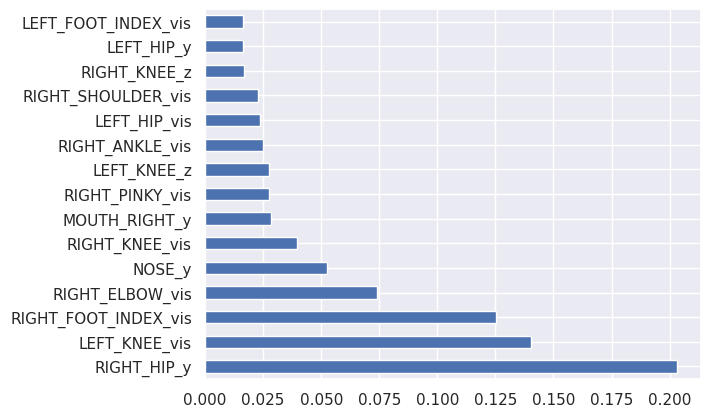

In [ ]:
feat_importances = pd.Series(clf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
y_pred2 = modelDecisionTreeRegressor.predict(x_test)
y_pred2

array([3., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 2., 2., 2., 0., 2., 0., 4., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 1., 1., 4., 4., 1., 2., 4., 4., 3., 4., 1., 3., 1., 3., 1., 1.,
       3., 4., 1., 1., 1., 1., 1., 4., 1., 1., 1., 1., 1., 4., 1., 4., 1.,
       0., 2., 4., 4., 4., 1., 4., 4., 4., 1., 1., 4., 1., 4., 4., 1., 4.,
       3., 4., 4., 1., 1., 1., 1., 4., 1., 1., 3., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 3., 0., 0., 3., 2., 2., 2., 2., 2., 2.,
       2., 0., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       3., 2., 2., 2., 2.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred3= modelLogistic.predict(x_test)

In [ ]:
print("Accuracy of DcisionTreeRegressor:",metrics.accuracy_score(y_test, y_pred2))
print("Recall_score of DcisionTreeRegressor:",metrics.recall_score(y_test, y_pred2,average='macro'))
print("Precision_score of DcisionTreeRegressor:",metrics.precision_score(y_test, y_pred2,average='macro'))

Accuracy of DcisionTreeRegressor: 0.6971677559912854
Recall_score of DcisionTreeRegressor: 0.6953596188785716
Precision_score of DcisionTreeRegressor: 0.6944727855945036


In [ ]:
print("Accuracy of DecisionTreeClassifier:",metrics.accuracy_score(y_test, y_pred1))
print("Recall_score of DecisionTreeClassifier:",metrics.recall_score(y_test, y_pred1,average='macro'))
print("Precision_score of DecisionTreeClassifier:",metrics.precision_score(y_test, y_pred1,average='macro'))

Accuracy of DecisionTreeClassifier: 0.7581699346405228
Recall_score of DecisionTreeClassifier: 0.7564161446608345
Precision_score of DecisionTreeClassifier: 0.7675641147406932


In [ ]:
print("Accuracy of LogisticRegression:",metrics.accuracy_score(y_test, y_pred3))
print("Recall_score of LogisticRegression:",metrics.recall_score(y_test, y_pred3,average='macro'))
print("Precision_score of LogisticRegression:",metrics.precision_score(y_test, y_pred3,average='macro'))

Accuracy of LogisticRegression: 0.8169934640522876
Recall_score of LogisticRegression: 0.81481406148037
Precision_score of LogisticRegression: 0.8233304412712267


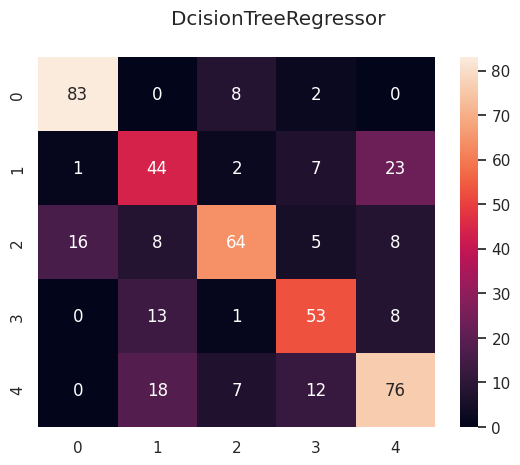

In [ ]:
# DcisionTreeRegressor
cm=confusion_matrix(y_test,y_pred2)
sns.heatmap(cm,annot=True)
plt.suptitle('DcisionTreeRegressor')
plt.show()

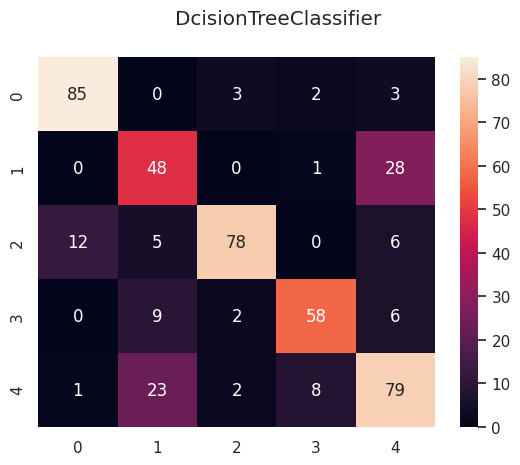

In [ ]:
# DcisionTreeClassifier
cm=confusion_matrix(y_test,y_pred1)
sns.heatmap(cm,annot=True)
plt.suptitle('DcisionTreeClassifier')
plt.show()

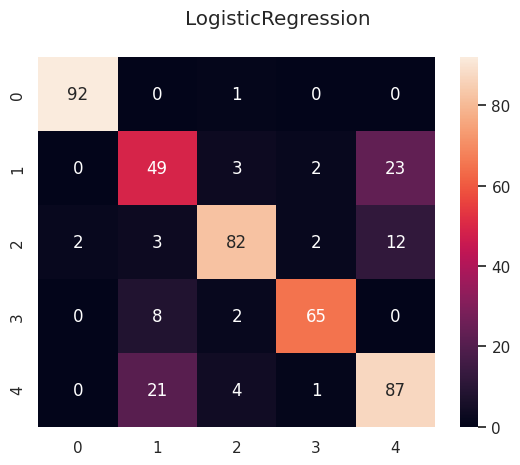

In [ ]:
# LogisticRegression
cm=confusion_matrix(y_test,y_pred3)
sns.heatmap(cm,annot=True)
plt.suptitle('LogisticRegression')
plt.show()